The MNIST dataset is a classic dataset for image classification, containing 70,000 grayscale images of handwritten digits (0-9).

0-9 are the digits, that form our classes. we have 10 classes. these 10 classes form 10 neurons of output layer.

Importing Necessary Libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt


In [2]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# this dataset contains 60,000 training images and 10,000 test images of handwritten digits (0-9)
# it belongs to Tensorflow Keras datasets module

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

In [4]:
x_test.shape

(10000, 28, 28)

In [5]:
print(y_test)

[7 2 1 ... 4 5 6]


In [6]:
#Displaying Sample Images from the MNIST Dataset
# Select random indices for displaying images
import numpy as np
indices = np.random.randint(0, x_train.shape[0], size=16)

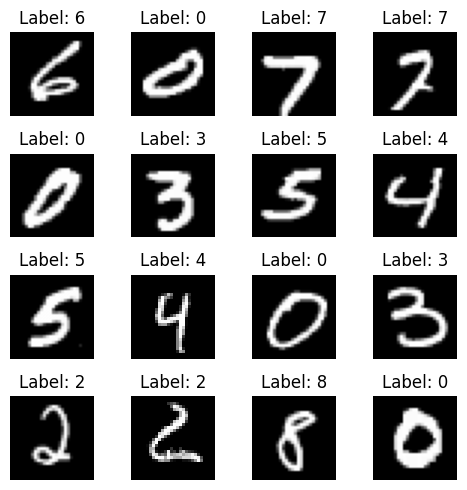

In [7]:
# Create a figure and subplots
fig, axes = plt.subplots(4, 4, figsize=(5, 5))

# Flatten the axes array for easy iteration
axes = axes.flatten()

for i, ax in enumerate(axes):
    image = x_train[indices[i]]
    label = y_train[indices[i]]
    ax.imshow(image, cmap='gray')
    ax.set_title(f"Label: {label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Reshape data for CNN input
img_rows, img_cols = 28, 28
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1) 
# the 1 here stands for single channel (grayscale)
# 60000 images of 28x28 pixels with 1 channel
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)


**Purpose of Reshaping**
The goal of this reshaping is to transform the data into a 4-dimensional array, which is the standard format for image data in CNNs. The dimensions represent:

Number of samples: The total number of images in the dataset.

Image height: The height of each image in pixels.

Image width: The width of each image in pixels.

Number of channels: The number of color channels in the image.

Example:If you have 60000 images of size 28x28 pixels and they are grayscale, the original shape of x_train would be (60000, 28, 28). After reshaping, it becomes (60000, 28, 28, 1).

**Why is this necessary?**

CNNs are designed to process data in this format. By reshaping the data, we ensure that it's compatible with the CNN's input layer.

**Code description:**
x_train: This is the variable holding the training data.

reshape(): This is a NumPy function to change the shape of an array without changing its data.

x_train.shape[0]: This part extracts the number of samples in the training data.

img_rows: The number of rows in each image.

img_cols: The number of columns in each image.

1: This indicates the number of channels in the image. For grayscale images, it's 1, while for color images, it would be 3 (RGB).

In [9]:
x_train.shape
#x_test.shape

(60000, 28, 28, 1)

In [10]:
# Normalize pixel values to be between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
# Convert class vectors to binary class matrices

num_classes = 10

# Convert labels to one-hot encoding for multi-class classification 
# this is necessary for training the CNN model, as it expects the labels to be in a categorical format
# for example, if the label is 3, it will be converted to a vector like [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
# this allows the model to output probabilities for each class during training and evaluation
# the to_categorical function from Keras is used to perform this conversion.


y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)


In [12]:
print(y_test)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# Create a CNN model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D(pool_size=(2, 2))) # Max pooling layer to reduce spatial dimensions 
model.add(Flatten()) # Flatten the 2D output to 1D for the fully connected layer, input to the dense layer must be 1D. This is input layer.
model.add(Dense(128, activation='relu')) # Hidden layer with 128 neurons and ReLU activation
model.add(Dense(num_classes, activation='softmax'))  # Output layer with softmax activation for multi-class classification

# softmax activation is used in the output layer to convert the output into probabilities for each class (0-9)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# loss function used is categorical_crossentropy, which is appropriate for multi-class classification problems. 
# The optimizer used is Adam, which is an efficient optimization algorithm that adjusts the learning rate during training. 
# The metric used to evaluate the model's performance is accuracy, which measures the proportion of correctly classified samples.

**Categorical cross-entropy** is a loss function used in machine learning for multi-class classification problems. It measures the difference between the true class distribution (the label) and the predicted probability distribution.

**How it works:**

Softmax Activation: The model outputs a vector of values, one for each possible class. These values are passed through a softmax function to convert them into probabilities that sum up to 1.

Cross-Entropy Calculation: The cross-entropy loss is calculated by comparing the predicted probability distribution with the true class distribution (one-hot encoded). The goal is to minimize this loss, which means the model should learn to predict probabilities closer to the true class.

**Adam: An Optimization Algorithm**

Adam is a popular optimization algorithm used in machine learning, especially for training neural networks. It combines the best aspects of two other optimization algorithms: AdaGrad and RMSprop.

How Adam Works:

Adaptive Learning Rates: Adam adapts the learning rate for each parameter individually, which helps accelerate training and improve performance.
Momentum: It incorporates momentum to help the algorithm escape local minima.
Bias Correction: To counteract the initial bias of the estimates, Adam includes bias correction mechanisms.

In [ ]:
# Train the model
history=model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 60ms/step - accuracy: 0.8734 - loss: 0.4555 - val_accuracy: 0.9759 - val_loss: 0.0803
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.9796 - loss: 0.0712 - val_accuracy: 0.9811 - val_loss: 0.0569
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.9864 - loss: 0.0456 - val_accuracy: 0.9843 - val_loss: 0.0456
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9906 - loss: 0.0330 - val_accuracy: 0.9834 - val_loss: 0.0516
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.9925 - loss: 0.0252 - val_accuracy: 0.9831 - val_loss: 0.0501
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 57ms/step - accuracy: 0.9950 - loss: 0.0177 - val_accuracy: 0.9853 - val_loss: 0.0441
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 56ms/step - accuracy: 0.9966 - loss: 0.0129 - val_accuracy: 0.9862 - val_loss: 0.0474
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 56ms/step - accuracy: 0.9980 - loss: 0.0087 - 

In [16]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,081,888 (7.94 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,387,926 (5.29 MB)

In [17]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9827 - loss: 0.0667
Test accuracy: 0.9861000180244446


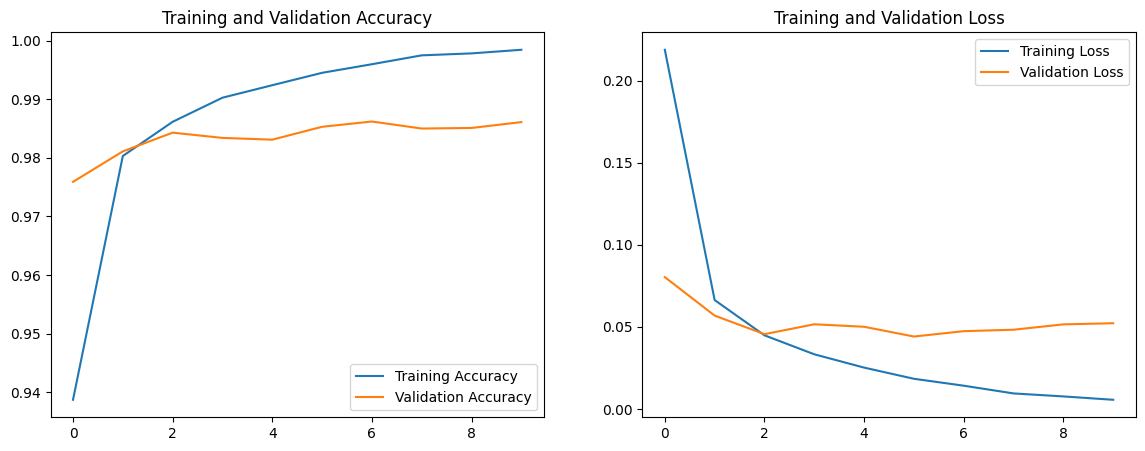

In [18]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()